$Лабораторная работа$  $№8 $

$Кокляева$ $Мария$ 

$Группа:$ $А-13-22$

#### Задача 8.1. Найти приближенное решение краевой задачи  с точностью 0.001.
                              


$
\left\{ 
    \begin{array}{l}
        -(k(x)u')'+q(x)u = f(x), &\\
        u(a) = U_a, u(b) = U_b ;
    \end{array} 
\right.
$

1.Cоставить разностную схему второго порядка точности и выписать коэффициенты  матрицы системы уравнений и коэффициенты правой части.

In [52]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve

In [53]:
def u_test(x):
    return 3/(1+2*x)

def q(x):
    return x + 2

def k(x):
    return 7-x


def f_test(x):
    return (12*x**3+36*x**2+39*x-168)/(1+2*x)**3
def f(x):
    return 3*x**3-1


def solve_with_run(a, b, c, d):
    n = len(d)
    for i in range(n):
        if b[i] == 0:
            raise ZeroDivisionError("На диагонали матрицы не должно быть нулей.")
    # Инициализация переменных для прогонки
    p = np.zeros(n)
    q = np.zeros(n)

    #Прямая прогонка
    p[0] = c[0] / b[0]
    q[0] = d[0] / b[0]

    for i in range(1, n):
        p[i] = c[i] / (b[i] - a[i] * p[i - 1])
        q[i] = (d[i] - a[i] * q[i - 1]) / (b[i] - a[i] * p[i - 1])

    #Обратная прогонка
    x = np.zeros(n)
    x[n - 1] = q[n - 1]
    for i in range(n - 2, -1, -1):
        x[i] = q[i] - p[i] * x[i + 1]
    return x

def Matrix(a,b,ua,ub, h, f, k , q):
    
    n = int((b - a) // h)
    x = np.linspace(a, b, n+1)
    A = np.zeros(n + 1)
    B = np.zeros(n + 1)
    C = np.zeros(n + 1)
    F = np.zeros(n + 1)

    # Граничные условия
    A[0] = 0
    B[0] = 1
    C[0] = 0
    F[0] = ua

    for i in range(1, n):
        A[i] = (-1)*k(x[i] - h/2)
        B[i] = k(x[i]+h/2)+k(x[i]-h/2) + q(x[i])*h**2
        C[i] = (-1)*k(x[i]+h/2)
        F[i] = h**2*f(x[i])

    A[-1] = 0
    B[-1] = 1
    C[-1] = 0
    F[-1] = ub
    return A,B,C,F


Шаг h = 0.1, ошибка = 0.0935
Шаг h = 0.05, ошибка = 0.0444
Шаг h = 0.025, ошибка = 0.0215
Шаг h = 0.0125, ошибка = 0.0106
Шаг h = 0.00625, ошибка = 0.0053
Шаг h = 0.003125, ошибка = 0.0026
Шаг h = 0.0015625, ошибка = 0.0013
Шаг h = 0.00078125, ошибка = 0.0007
8


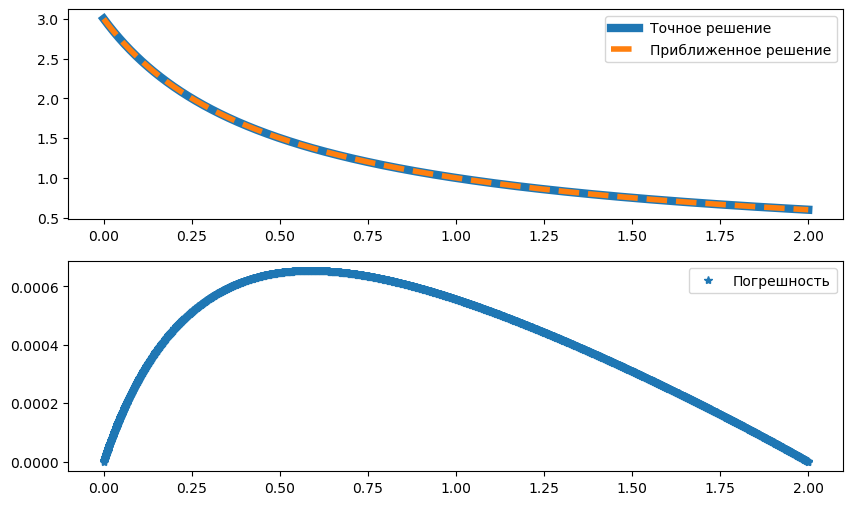

In [54]:
#Тестовый пример
a = 0
b = 2
ua = u_test(a)
ub = u_test(b)
eps = 0.001

h = 0.1
max_error = 1000
iteration = 0

while max_error > eps and iteration<100:
    n = int((b - a) // h)+1
    x = np.linspace(a, b, n)
    A,B,C,F = Matrix(a,b,ua,ub, h,f_test,k, q)
    y = solve_with_run(A, B, C, F)
    
    # Сравнение с аналитическим решением
    max_error = np.max(np.abs(y - u_test(x)))
    print(f"Шаг h = {h}, ошибка = {max_error:.4f}")
    h /= 2  # Уменьшаем шаг
    iteration += 1
    
print(iteration)
fig,axes =plt.subplots(2,1, figsize = (10,6))
axes[0].plot(x,u_test(x), linewidth=6,label ='Точное решение')
axes[0].plot(x,y,'--',  linewidth=4,label ='Приближенное решение')
axes[1].plot(x,y-u_test(x), '*',label ='Погрешность')
axes[0].legend()
axes[1].legend()

Шаг h = 0.1, ошибка = 0.005528163658085727
Шаг h = 0.05, ошибка = 0.0028772219952184486
Шаг h = 0.025, ошибка = 0.0014648975054562345
Шаг h = 0.0125, ошибка = 0.0007390798151050149
Заданная точность достигается при h = 0.00625


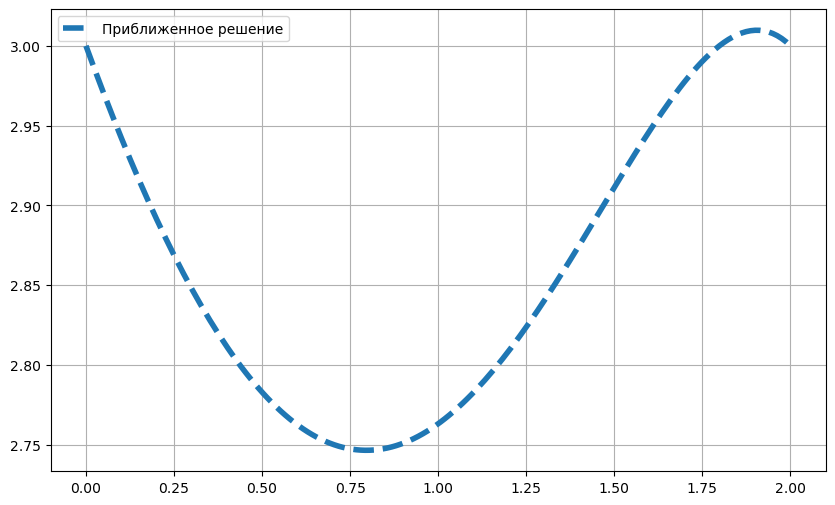

In [55]:
# Решение основной задачи
def f(x):
    return 3*x**3 + 1
a = 0
b = 2
ua = 3
ub = 3
eps = 0.001

h = 0.1
max_error = 1000
iteration = 0

max_error = 1
n = 1
while max_error > eps:
    n=int((b-a)/h)
    x = np.linspace(a, b, n)
    A,B,C,F = Matrix(a,b,ua,ub, h,f,k,q)
    y1 = solve_with_run(A, B, C, F)

    
    A1,B1,C1,F1 = Matrix(a,b,ua,ub,h/2,f,k,q)
    y2 = solve_with_run(A1, B1, C1, F1)
    
    max_error = np.max(np.abs(y2[::2] - y1))/(2**2 - 1)
    print(f"Шаг h = {h}, ошибка = {max_error}")
    h /=2
     

print(f"Заданная точность достигается при h = {h}")
fig,axes =plt.subplots(1, figsize = (10,6))
axes.plot(x,y1,'--',  linewidth=4,label ='Приближенное решение')
axes.legend()
axes.grid()

#### Задача 8.2.Стержень составляется из трех частей одинаковой длины 1 и с разными коэффициентами теплопроводности. Концы стержня поддерживаются при постоянной температуре. В каком порядке следует составить части стержня, чтобы указанная точка 1,8 стержня имела максимальную температуру? 
Математически задача формулируется следующим образом: найти приближенное решение краевой задачи 
$
\left\{ 
    \begin{array}{l}
        -(k(x)u')'+q(x)u = f(x), x∈(1,3)&\\
        u(a) = U_a, u(b) = U_b ;
    \end{array} 
\right.
$

где

$K(x) =
\left\{
    \begin{array}{l}
        k_1(x), если 0<=x<=1 &\\
        k_2(x), если 1<=x<=2, &\\
        k_3(x), если 2<=x<=3 ;
    \end{array} 
\right.
$

In [56]:
import math

def f(x1, x2):
    return 3/4*x2**4 +x2 - (3/4*x1**4 +x1 ) 

def k(x,x1,x2, variation,h):
    if 0<= x <= 1:
        return ((1/h)*variation[0](x1,x2))**(-1)
    if 1<x<=2:
        return ((1/h)*variation[1](x1,x2))**(-1)
    if 2<x<=3:
        return ((1/h)*variation[2](x1,x2))**(-1)
    
def k1(x1,x2):
    return -math.log(abs(x2-7)) - (-math.log(abs(x1-7)))
def k2(x1,x2):
    return x2/7 - x1/7
def k3(x1,x2):
    return -1/(5*(x2+2)) -(-1/(5*(x1+2)))

def q(x1,x2):
    return x2**2/2 + 2*x2 - (x1**2/2 + 2*x1)

def Matrix(a,b,ua,ub, h, variations):
    
    n = 99
    x = np.linspace(a, b, n+1)
    A = np.zeros(n + 1)
    B = np.zeros(n + 1)
    C = np.zeros(n + 1)
    F = np.zeros(n + 1)

    # Граничные условия
    A[0] = 0
    B[0] = 1
    C[0] = 0
    F[0] = ua

    for i in range(1, n):
        A[i] = (-1)*k(x[i],x[i] - h,x[i],variations,h)
        B[i] = k(x[i],x[i],x[i]+h,variations,h)+k(x[i],x[i]-h,x[i],variations,h) + q(x[i]+h/2,x[i]-h/2)*h**2*(1/h)
        C[i] = (-1)*k(x[i],x[i],x[i]+h,variations,h)
        F[i] = h**2*f(x[i]-h/2, x[i]+h/2) *(1/h)

    A[n] = 0
    B[n] = 1
    C[n] = 0
    F[n] = ub
    return A,B,C,F


In [57]:
import itertools

a = 0
b = 3
ua=3
ub = 3

x0 = 1.8

label_variations = list(itertools.permutations([1, 2, 3]))
all_variations = list(itertools.permutations([k1, k2, k3]))
print(label_variations)

colors = ["#7607B2", "#B2168E","#BA2354"]

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]


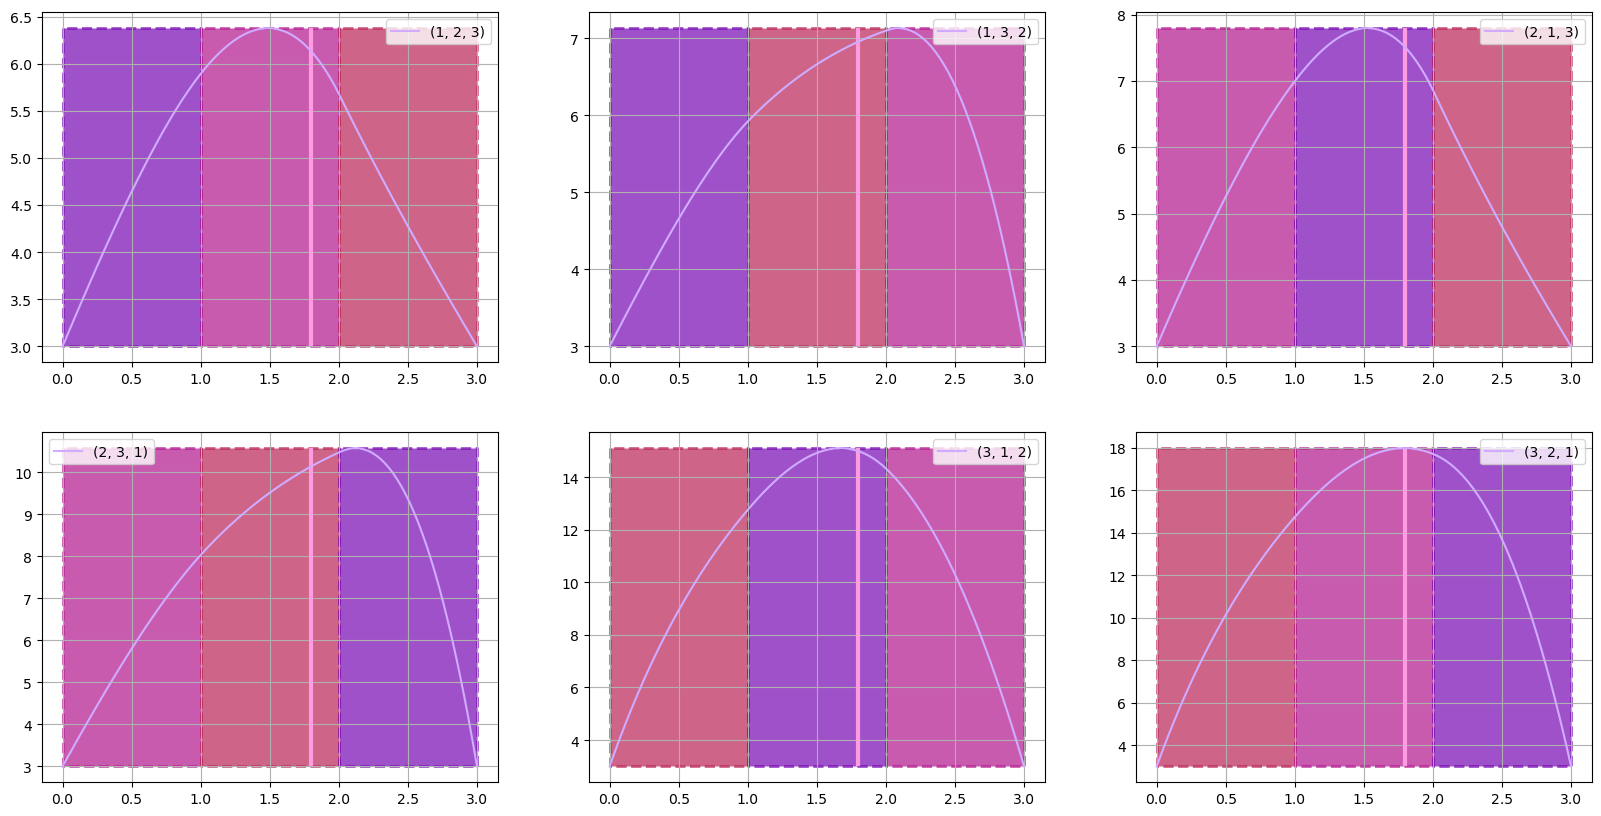

In [58]:
h = (b-a)/100
mass = []
fig,axes =plt.subplots(2,3, figsize = (20,10))
for i in range(len(label_variations)):
    A,B,C,F = Matrix(a,b,ua,ub, h, all_variations[i])
    y = solve_with_run(A, B, C, F)
    mass.append(y)
    axes[i//3][i%3].vlines(x0,y.min(), y.max(), color = "#FF9CE1",linewidth=3 )
    axes[i//3][i%3].plot(np.linspace(a,b,100), y, label= label_variations[i], color = "#D0ABFF")
    axes[i//3][i%3].fill_between([0,1], y.min(), y.max(), color = colors[label_variations[i][0]-1],alpha=0.7,linewidth=2,linestyle='--')
    axes[i//3][i%3].fill_between([1,2], y.min(), y.max(), color = colors[label_variations[i][1]-1],alpha=0.7,linewidth=2,linestyle='--')
    axes[i//3][i%3].fill_between([2,3], y.min(), y.max(), color = colors[label_variations[i][2]-1],alpha=0.7,linewidth=2,linestyle='--')
    axes[i//3][i%3].grid()
    axes[i//3][i%3].legend()

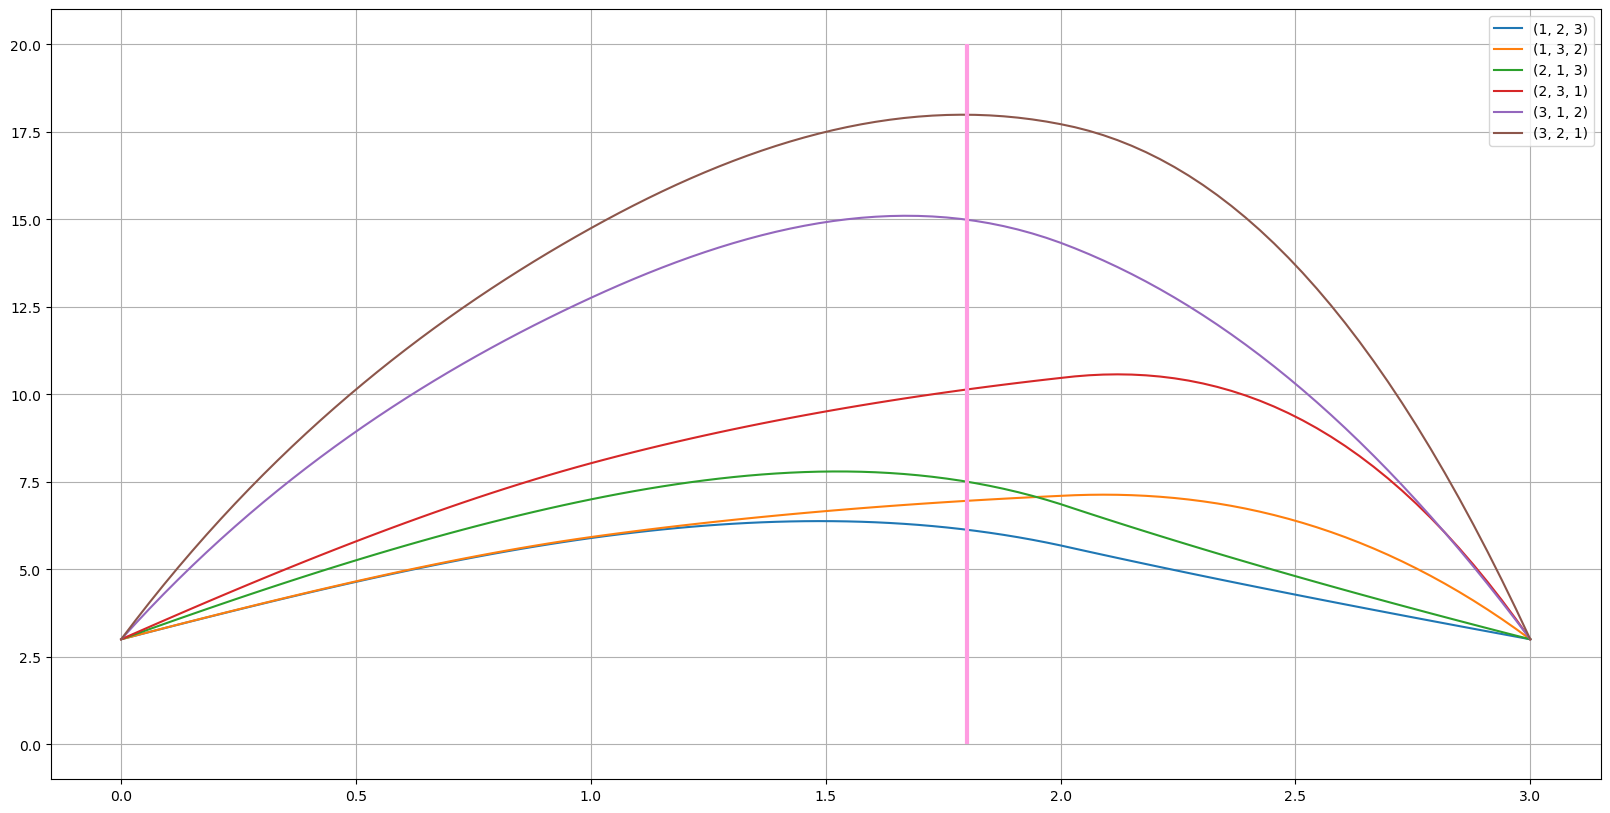

In [59]:
fig,axes =plt.subplots(1, figsize = (20,10))
for i in range(len(mass)):
    axes.plot(np.linspace(a,b,100),mass[i],label=f'{label_variations[i]}')
    
axes.vlines(x0,0, 20, color = "#FF9CE1",linewidth=3 )    
axes.grid()
axes.legend()

максимальное значение достигается в (3,2,1) при х = 1.8


In [60]:
import multiprocess 
import numpy as np
import matplotlib.pyplot as plt
import gc
from itertools import permutations


## Задание 8.3
### Решить краевую задачу методом баланса с точностью 0.001. 

$$
\begin{cases}
-((7-x)u')' + (x+2)u = ((3x)^{3}+1),   x\in(0, 2) \\
-k(0)u'(0)+0.5u(0) = 0 \\ 
k(2)u'(2) + 0.5u(2) = 0
\end{cases}
$$


$$-7u'(0)+0.5u(0) = 0$$
$$5u'(2) + 0.5u(2) = 0$$



Рассмотрим тестовый пример
$$
\begin{cases}
-((7-x)u')' + (x+2)u = \frac{12x^3 + 36x^2 + 39x - 168}{(1+2x)^3},   x\in(0, 2) \\
-k(0)u'(0)+0.5u(0) = \frac{87}{2} \\ 
k(2)u'(2) + 0.5u(2) = -\frac{9}{10}
\end{cases}
$$


$ \int{f(x)}dx = \frac{9}{4}\,ln(|2x+1|)+ \frac{3}{4}\dfrac{8x^3\,+12x^2\,-2x\,+57}{(2x+1)^2}+C $

$ \int{q(x)}dx = \frac{x^2}{2} + 2x + C$

$ \int{k(x)}dx = 7x - \frac{x^2}{2} + C$

In [61]:
#  НЕ интегралы
def k(x):
    return 7 - x
def q(x):
    return x+2
def f(x):
    return (12*x**3+36*x**2+39*x-168)/(1+2*x)**3
def u_test(x):
    return 3/(1+2*x)

In [62]:
# Интегралы
def Q_int(x):
    return (x**2)/2 +2*x
def F_int(x):
    return 9/4*math.log(abs(2*x+1)) + 3/4 *(8*x**3+12*x**2-2*x+57)/(2*x+1)**2
def K_int(x):
    return -math.log(abs(7-x))

In [63]:
# Функции для решения
def run(A,d):
    n = A.shape[0]
    if A.shape != (n, n) or d.shape != (n,):
        raise ValueError("Размеры матрицы и вектора должны соответствовать.")
    a = np.zeros(n)  # Нижняя диагональ (включая нулевой элемент)
    b = np.zeros(n)  # Главная диагональ
    c = np.zeros(n)  # Верхняя диагональ (включая нулевой элемент)

    # Извлечение диагоналей из матрицы A
    for i in range(n):
        if i > 0:
            a[i] = A[i, i-1]
        b[i] = A[i, i]
        if i < n-1:
            c[i] = A[i, i+1]
    # Прямой ход
    c_prime = np.zeros(n)
    d_prime = np.zeros(n)
    c_prime[0] = c[0] / b[0]
    d_prime[0] = d[0] / b[0]
    for i in range(1, n):
        denominator = b[i] - a[i] * c_prime[i - 1]
        if denominator == 0:
            return None  # Ошибка: нет решения (вырожденная матрица)
        c_prime[i] = c[i] / denominator
        d_prime[i] = (d[i] - a[i] * d_prime[i - 1]) / denominator

    # Обратный ход
    x = np.zeros(n)
    x[n - 1] = d_prime[n - 1]
    for i in range(n - 2, -1, -1):
        x[i] = d_prime[i] - c_prime[i] * x[i + 1]
    return x

def initialize_coefficients(k, q, f, x, u_a, u_b, F_int,Q_int,K_int):
    N = len(x)-1
    h = x[1] - x[0]

    A = np.zeros((N+1,N+1))

    F = np.zeros(N+1)
    
    k_a = k(x[0])
    
    A[0][0] = 0.5 + k(0) / h
    A[0][1] = -k(0) / h
    
    F[0]=u_a

    k_b = k(x[-1])
    A[-1][-2] = -k_b/ h
    A[-1][-1] = 0.5 + k_b / h 
    F[-1] = u_b
    

    for i in range(1, N):
        k_i_minus = (h) / (K_int(x[i]) - K_int(x[i]-h))
        k_i_plus = (h) / (K_int(x[i]+h) - K_int(x[i])) 
        A[i][i-1] = -k_i_minus / (h**2)
        A[i][i+1] = -k_i_plus / (h**2)
        A[i][i] = (k_i_minus + k_i_plus) / h**2 + (Q_int(x[i]+h/2) - Q_int(x[i]-h/2))/(h)
        F[i] = (F_int(x[i]+h/2) - F_int(x[i]-h/2))/(h)
    return A, F

def runge_error(U_h, U_h2):
    return np.max(np.abs(U_h - U_h2)) 



In [64]:
a, b = 0, 2      
u_a, u_b =87/2, -9/10 
eps = 1e-3



h = (b-a)/2 
error = float('inf') 
x_h = np.arange(a, b + h, h)
A, F = initialize_coefficients(k, q, f, x_h, u_a, u_b, F_int,Q_int,K_int)
U_h = run(A,F)
iter = 0 
errors = []

while error > eps and iter < 25:
    iter+=1
    h_2 = h / 2

    x_h2 = np.arange(a, b + h_2, h_2)

    A_h2, F_h2 = initialize_coefficients(k, q, f, x_h2, u_a, u_b, F_int,Q_int,K_int)
    U_h2 = run(A_h2,F_h2)

    error = runge_error(U_h, U_h2[::2])

    print(f"Итерации = {iter}, шаг h = {h_2}, ошибка = {error}")
    errors.append(error)
    if error > eps:
        h = h_2
        x_h = x_h2
        U_h = U_h2
    else:
        print("всё")
        break
print()
print(f"Точность достигнута при шаге {h_2}")
error = np.abs(U_h2 - u_test(x_h2))
print(f"Максимальная погрешность: {np.max(error)}")

Итерации = 1, шаг h = 0.5, ошибка = 4.132495026669368
Итерации = 2, шаг h = 0.25, ошибка = 2.4855464944032466
Итерации = 3, шаг h = 0.125, ошибка = 1.6504276544121614
Итерации = 4, шаг h = 0.0625, ошибка = 0.9978363525519311
Итерации = 5, шаг h = 0.03125, ошибка = 0.5554018324769574
Итерации = 6, шаг h = 0.015625, ошибка = 0.2939289777820866
Итерации = 7, шаг h = 0.0078125, ошибка = 0.15132057598819904
Итерации = 8, шаг h = 0.00390625, ошибка = 0.07678925787501356
Итерации = 9, шаг h = 0.001953125, ошибка = 0.03868203728438946
Итерации = 10, шаг h = 0.0009765625, ошибка = 0.01941352762350368
Итерации = 11, шаг h = 0.00048828125, ошибка = 0.009724973895662181
Итерации = 12, шаг h = 0.000244140625, ошибка = 0.004867049890042718
Итерации = 13, шаг h = 0.0001220703125, ошибка = 0.002434667013744285
Итерации = 14, шаг h = 6.103515625e-05, ошибка = 0.0012176189376704727
Итерации = 15, шаг h = 3.0517578125e-05, ошибка = 0.0006088802396422288
всё

Точность достигнута при шаге 3.0517578125e-05


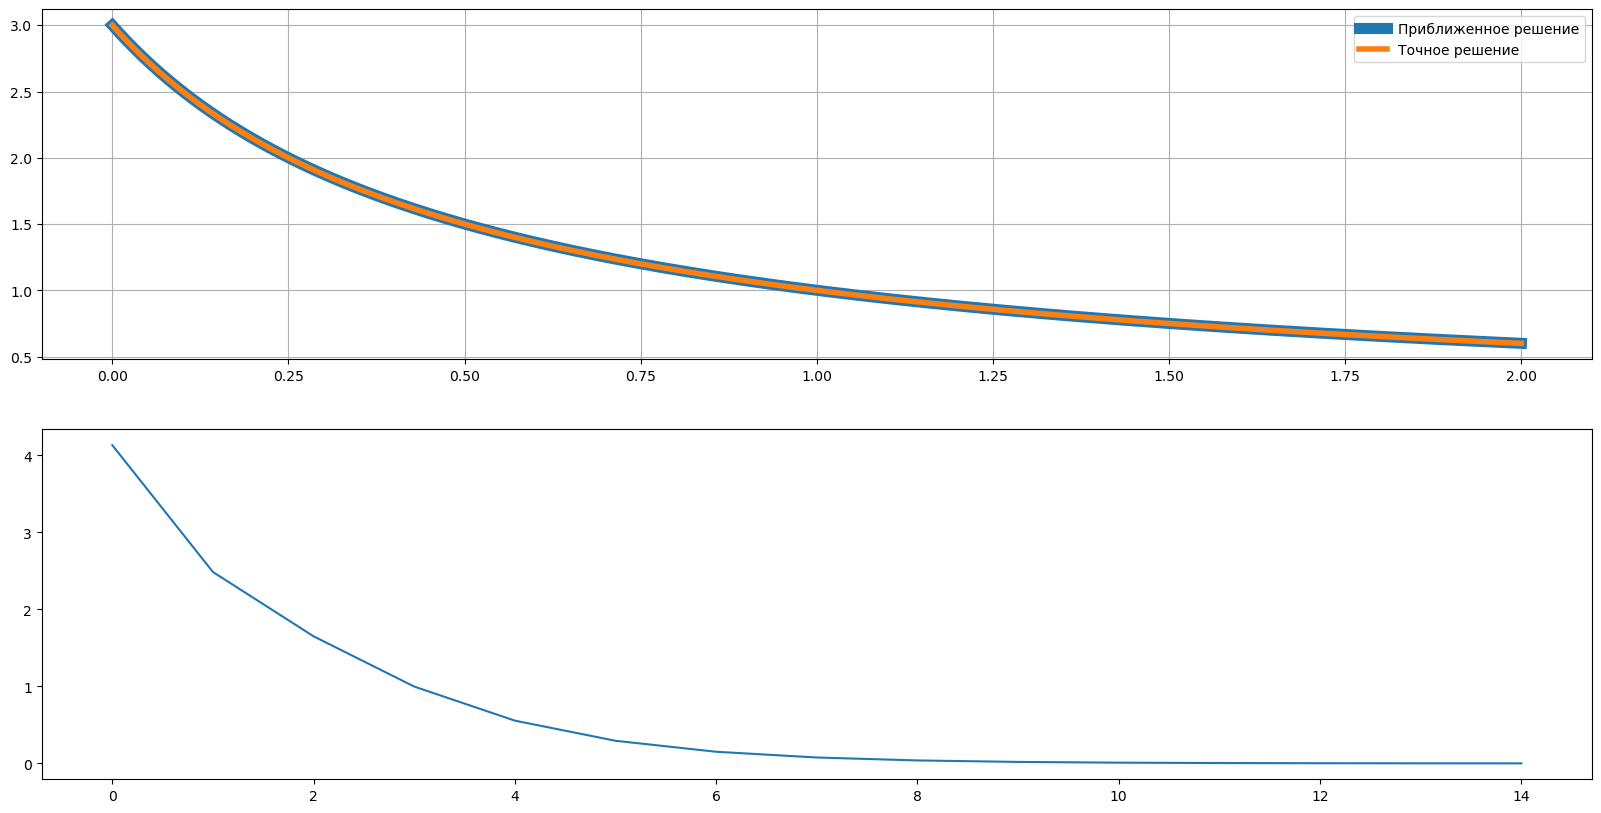

In [65]:
fig,axes =plt.subplots(2,1, figsize = (20,10))

axes[0].plot(x_h2,U_h2, label="Приближенное решение", lw = 8)
axes[0].plot(x_h2,u_test(x_h2), label="Точное решение",lw=4)
axes[1].plot(errors, label="Ошибка")
axes[0].legend()
axes[0].grid()

In [66]:
#Основная задача
def f1(x):
    return 3*x**3+ 1

def F1_int(x):
    return 3/4*x**4+x

In [67]:
a, b = 0, 2      
u_a, u_b =0,0
eps = 1e-3



h = (b-a)/2 
error = float('inf') 
x_h = np.arange(a, b + h, h)
A, F = initialize_coefficients(k, q, f1, x_h, u_a, u_b, F1_int,Q_int,K_int)
U_h = run(A,F)
iter = 0 
errors = []

while error > eps and iter < 25:
    iter+=1
    h_2 = h / 2

    x_h2 = np.arange(a, b + h_2, h_2)

    A_h2, F_h2 = initialize_coefficients(k, q, f1, x_h2, u_a, u_b, F1_int,Q_int,K_int)
    U_h2 = run(A_h2,F_h2)

    error = runge_error(U_h, U_h2[::2])

    print(f"Итерации = {iter}, шаг h = {h_2}, ошибка = {error}")
    errors.append(error)
    if error > eps:
        h = h_2
        x_h = x_h2
        U_h = U_h2
    else:
        print("всё")
        break
print()
print(f"Точность достигнута при шаге {h_2}")


Итерации = 1, шаг h = 0.5, ошибка = 0.5199313674101425
Итерации = 2, шаг h = 0.25, ошибка = 0.3445466213959685
Итерации = 3, шаг h = 0.125, ошибка = 0.1916664009927389
Итерации = 4, шаг h = 0.0625, ошибка = 0.10010555852923764
Итерации = 5, шаг h = 0.03125, ошибка = 0.05103411669392788
Итерации = 6, шаг h = 0.015625, ошибка = 0.025750936874064045
Итерации = 7, шаг h = 0.0078125, ошибка = 0.012932478505341738
Итерации = 8, шаг h = 0.00390625, ошибка = 0.006480307942949182
Итерации = 9, шаг h = 0.001953125, ошибка = 0.0032436480856743444
Итерации = 10, шаг h = 0.0009765625, ошибка = 0.0016226946945994136
Итерации = 11, шаг h = 0.00048828125, ошибка = 0.000811564636568729
всё

Точность достигнута при шаге 0.00048828125


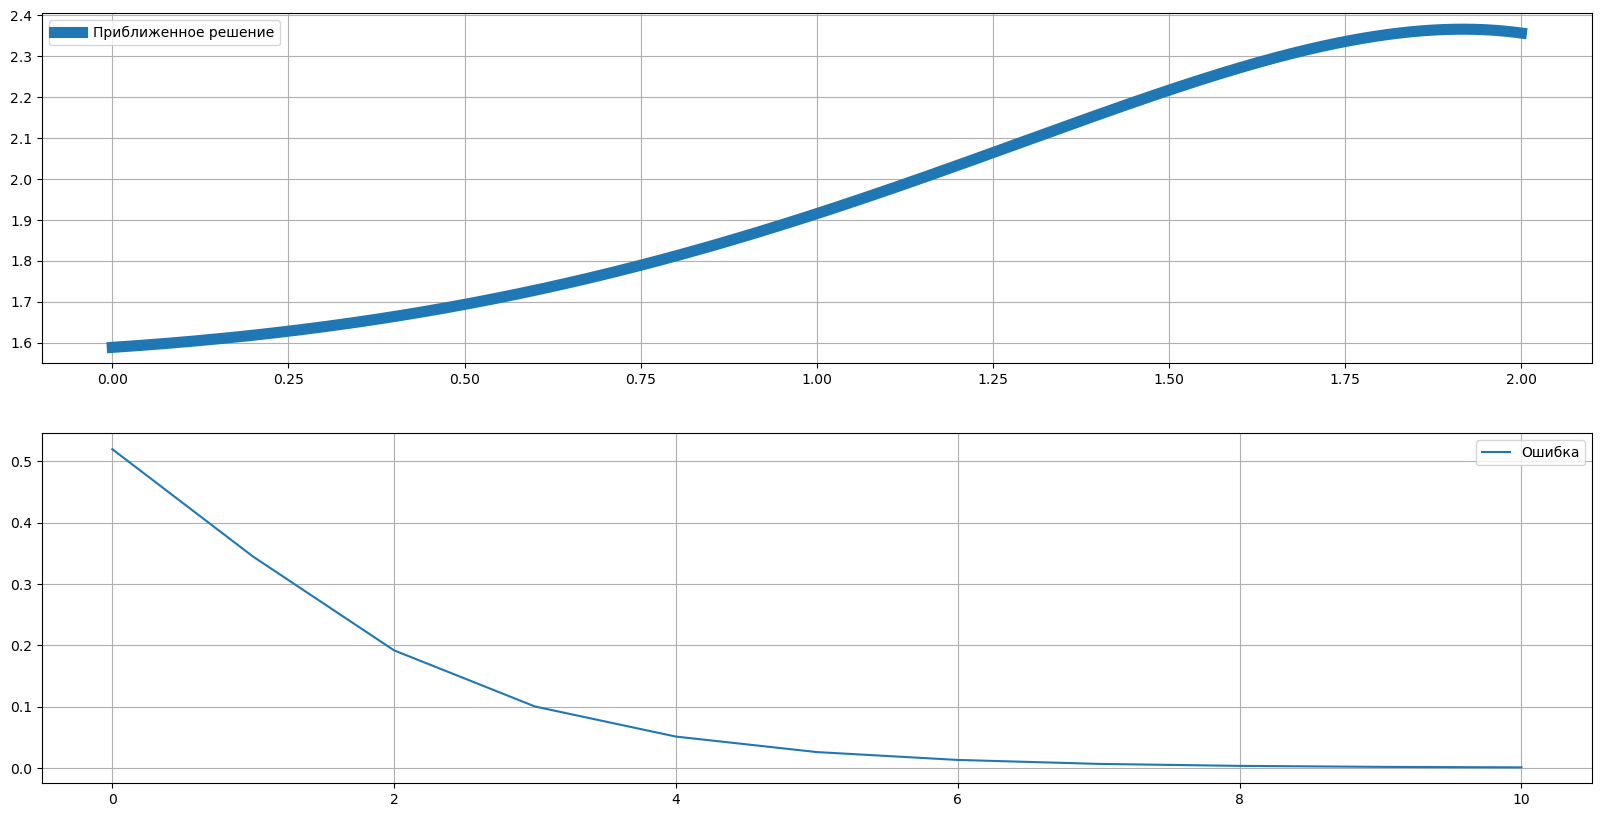

In [68]:
fig,axes =plt.subplots(2,1, figsize = (20,10))

axes[0].plot(x_h2,U_h2, label="Приближенное решение", lw = 8)
axes[1].plot(errors,label="Ошибка")
axes[0].legend()
axes[0].grid()
axes[1].legend()
axes[1].grid()